In [2]:
import nbimporter
import numpy as np
import skimage
import multiprocessing
import threading
import queue
import os,time
import math
from p1 import get_visual_words
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn  as  sns

<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Bag of Visual Words - Assignment 2

     Instructor: Kris Kitani                       TAs:Paritosh (Lead), Rawal, Yan, Zen, Wen-Hsuan, Qichen

## Theory Questions

This section should include the visualizations and answers to specifically highlighted questions from P1 to P4. This section will be manually Graded 

#### Q1.1.1 (5 Points WriteUp)
What visual properties do each of the filter functions (See Figure below) pick up? You should group the filters into categories by its purpose/functionality. Also, why do we need multiple scales of filter responses? **Answer in the writeup. Answer in your write-up.**

<img align="center" src="figures/filters_image.png" width="500">
<figcaption align="center"><b>Figure1. The provided multi-scale filter bank</b></figcaption>

The filters in these filter banks are Gaussian filter, Laplacian of Gaussian filter, the derivative of Gaussian filter in x-direction and derivative of Gaussian filter in the y-direction. The Gaussian filter is used for reducing the high frequencies and smoothening or blurring the image. Laplacian of Gaussian filter detects a sudden change in images, so it is used as an edge detector. The derivatives of the Gaussian is used to get vertical edges (x-direction) and horizontal edges (y-direction) in the respective direction.
We need multiple scales of filter responses because we don't know the scale of the point of interest. A line in one scale can be represented as a point on another scale. So, with multiple scales of filter, we will be able to better represent the features.

### Q1.3.1 (5 Points WriteUp)

Visualize three wordmaps of images from any one of the category. **Include these in your write-up, along with the original RGB images. Include some comments on these visualizations: do the “word” boundaries make sense to you?**. We have provided helper function to save and visualize the resulting wordmap in the util.py file. They should look similar to the ones in Figure 2.

<img align="center" src="./figures/textons.jpg" width="800">
<figcaption align = "center"><b>Figure 2. Visual words over images. You will use the spatially un-ordered distribution of visual words in a region (a bag of visual words) as a feature for scene classification, with some coarse information provided by spatial pyramid matching [2]</b></figcaption>

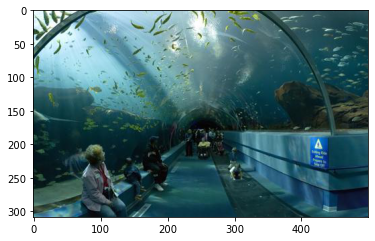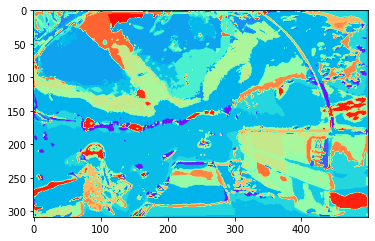 

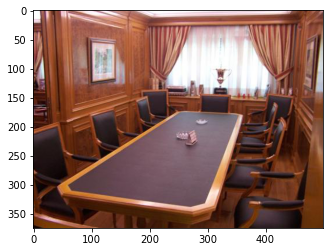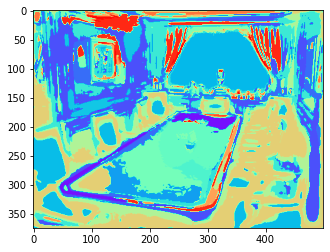

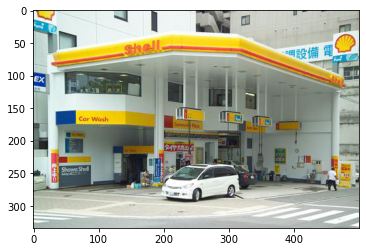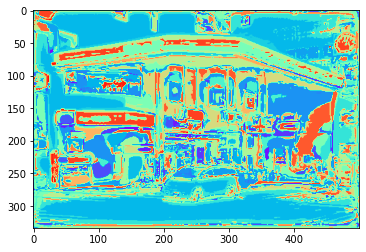

Yes, consider the meeting room image. The edges and corner of the table can be visualized from the wordmap of the image.

### Q2.1
**For 5 Images, include their visual word maps and histograms**

The visual word for images and their respective histograms are shown below :

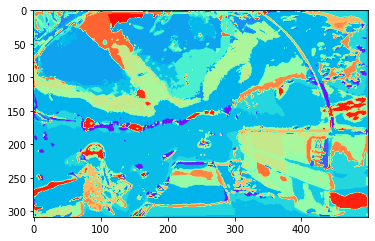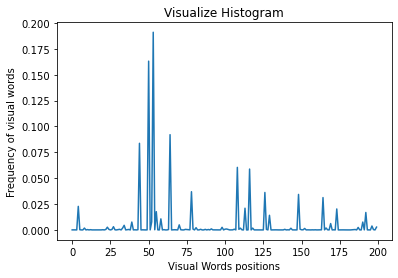

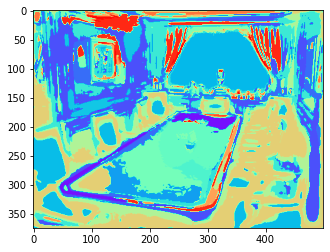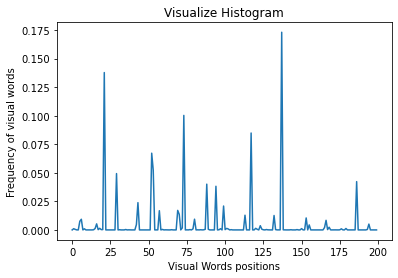

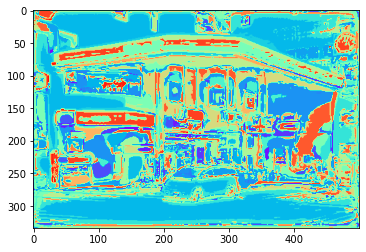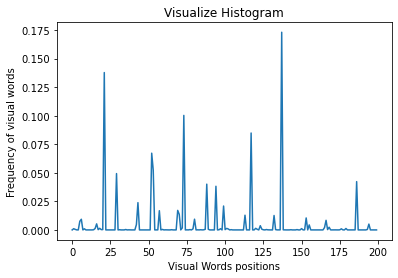

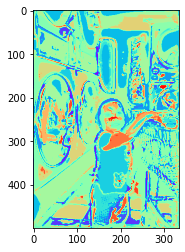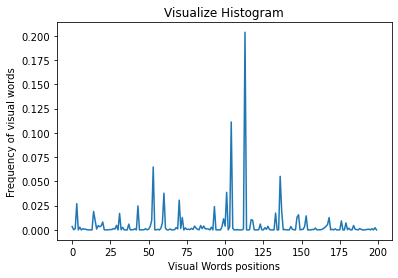

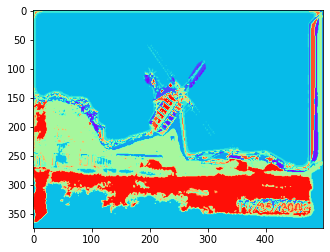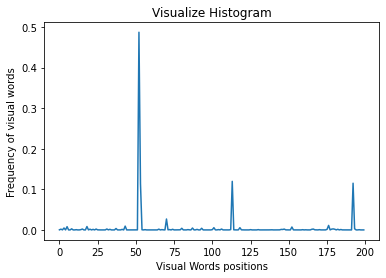

### Q3.1.1 
Submit the visualization of Confusion Matrix and the Accuracy value

In [24]:
conf_mat = np.load("./conf_matrix.npy")
accuracy = np.trace(conf_mat)/np.sum(conf_mat)
print(accuracy*100)

60.0


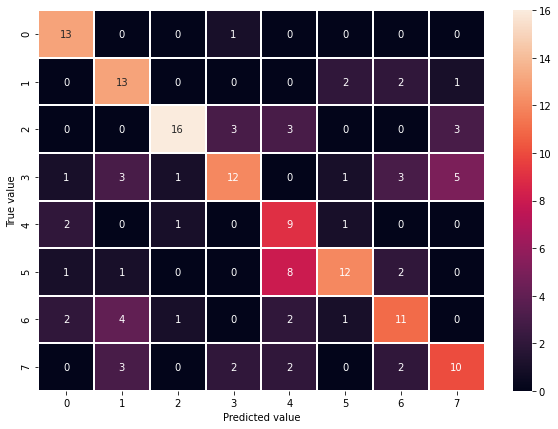

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat,annot=True,linewidths=1)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

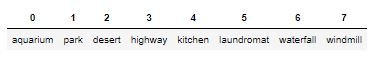

The accuracy is 60%

#### Q3.1.2 (5 points WriteUp):

As there are some classes/samples that are more difficult to classify than the rest using the bags-of-words approach, they are more easily classified incorrectly into other categories. **List some of these classes/samples and discuss why they are more difficult.**

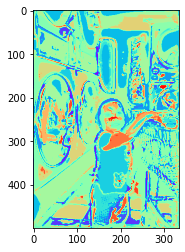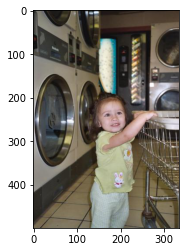 

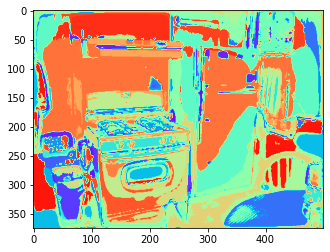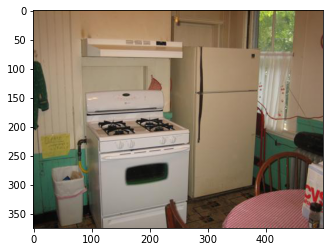

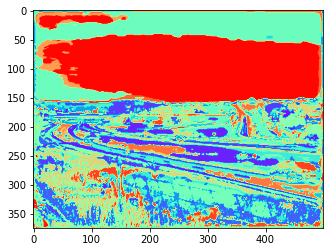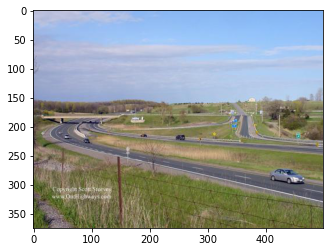

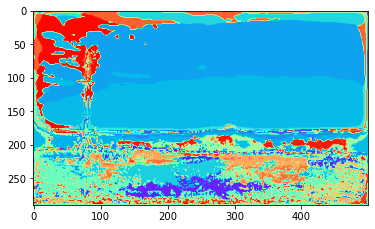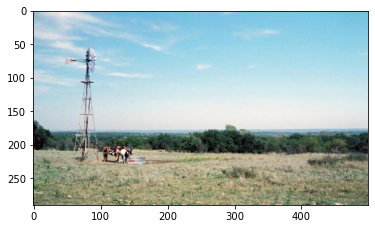

From the above confusion matrix, labels = 5, 3, 6  were most difficult to classify. These labels correspond to laundromat, highway and waterfall. Many of the laundromats are misclassified as the kitchen. One possible explanation would be similar features in both images. In the kitchen, the features representing the oven seems similar to the features representing the washer/dryer. Also, highways were misclassified as windmills. Consider the example given above, the possible explanation being the lesser presence of windmill faeatures in the road. So, the entire background mostly looks like a road in the windmill image.

### Q3.1.3 [Extra Credit](10 points) Manually Graded:

Now that you have seen how well your recognition system can perform on a set of real images, you can experiment with different ways of improving this baseline system. 

Include the changes, modification you made and the impact it had on accuracy.

Tune the system you build to reach around 65\% accuracy on the provided test set (``data/test_data.npz``). **In your writeup, document what you did to achieve such performance: (1) what you did, (2) what you expected would happen, and (3) what actually happened.** Also, include a file called ``custom.py/ipynb`` for running your code.

Performing a grid search on:

`filter_scales`: a list of filter scales used in extracting filter response

`K`: the number of visual words and also the size of the dictionary

`alpha`: the number of sampled pixels in each image when creating the dictionary

`L`: the number of spatial pyramid layers used in feature extraction

Initial values of alpha = 150, n_clusters = 200, L = 3 and filter scales  = [1, 2, 4, 8, 8*sqrt(2)]: accuracy = 60%

|alpha | c_clusters |  L  | filterscales | Accuracy | Expected outcome
| --- | --- | --- |--- | --- | --- |
|200 | 150 | 4 | initial | 58.75 | Increase in accuracy because of more consideration of spatial information|
|200 | 150 | 2 | initial | 59.375 |
|200 | 200 | 3 | initial | 62.5 |Increase in accuracy because of consideration of more feature points|
|250 | 200 | 3 | initial | 66.875 |Increase in accuracy because of consideration of more feature points|


### Q3.1.4 [Extra Credit](10 points):
**Inverse Document Frequency:** With the bag-of-word model, image recognition is similar to classifying a document with words. In document classification, inverse document frequency (IDF) factor is incorporated which diminishes the weight of terms that occur very frequently in the document set. For example, because the term "the" is so common, this will tend to incorrectly emphasize documents which happen to use the word "the" more frequently, without giving enough weight to the more meaningful terms.

In the homework, the histogram we computed only considers the term frequency (TF), i.e.  the number of times that word occurs in the word map.  Now we want to weight the word by its inverse document frequency.  The IDF of a word is defined as:

\begin{align*} IDF_w &= log \frac{T}{|\{d: w \in
d\}|}\\ \end{align*}

Here, $T$ is number of all training images, and $|\{d:w\in d\}|$ is the number of images $d$ such that $w$ occurs in that image.

**In your writeup: How does Inverse Document Frequency affect the performance? Better or worse? Explain your reasoning?**

YOUR ANSWER HERE

### Q4.2.1 
**Report the confusion matrix and accuracy for your results in your write-up. Can you comment in your writeup on whether the results are better or worse than classical BoW - why do you think that is?**

In [5]:
conf_matrix = np.load("./trained_conf_matrix.npy")
accuracy = np.trace(conf_matrix)/np.sum(conf_matrix)
print(accuracy*100)

92.5


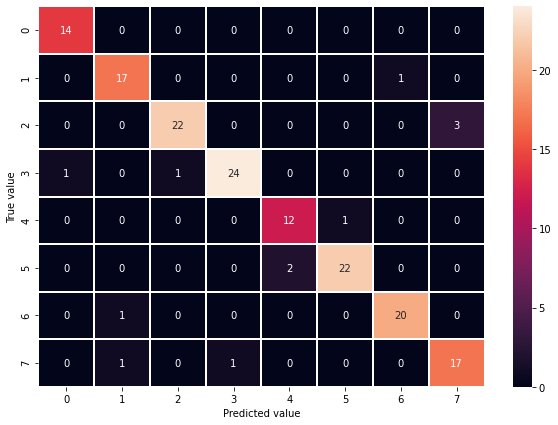

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,linewidths=1)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

The results are better than a bag of words.

Reasons :
1. In BoW, we need to perform feature extraction for training. In that process, some information like spatial relationships and direction is lost. But in CNN, the pixel data is directly used, and the convolution of the image preserves each pixel information.



2. VGG16 is 16 layers deep, and it is trained on imagenet, consisting of 14M annotated images. So, the VGG is trained on more images than BoW.

### References

[1]  James Hays and Alexei A Efros. Scene completion using millions of photographs.ACM Transactions onGraphics (SIGGRAPH 2007), 26(3), 2007.

[2]  S. Lazebnik, C. Schmid, and J. Ponce. Beyond bags of features: Spatial pyramid matching for recogniz-ing natural scene categories.  InComputer Vision and Pattern Recognition (CVPR), 2006 IEEE Conferenceon, volume 2, pages 2169–2178, 2006.

[3]  Jian xiong Xiao, J. Hays, K. Ehinger, A. Oliva, and A. Torralba. Sun database: Large-scale scene recogni-tion from abbey to zoo.2010 IEEE Computer Society Conference on Computer Vision and Pattern Recognition,pages 3485–3492, 2010.14